# Option A — Classification : KNN, SVM, Decision Tree, RandomForest, Neural Network

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# 1. Chargement et Préparation
df = pd.read_csv('..\STEP1_PRETREATMENT\DISASTERS_CLEANED.csv')

df.head()



<>:14: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
<>:14: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
C:\Users\ZR\AppData\Local\Temp\ipykernel_15704\3567082673.py:14: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
  df = pd.read_csv('..\STEP1_PRETREATMENT\DISASTERS_CLEANED.csv')


,Year,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,Region,Continent,Latitude,Longitude,...,No Affected,No Homeless,Total Affected,Total Damages ('000 US$),Insured Damages ('000 US$),Start_Date,End_Date,Duration_Days,Month,Season
0,1902,0,0,0,0,0,0,0,14.000,-91.00,...,0.0,0.0,0.0,25000.0,0.0,1902-04-18,1902-04-18,0.0,4.0,0
1,1902,0,0,1,1,0,0,0,14.400,-90.22,...,0.0,0.0,0.0,0.0,0.0,1902-04-08,1902-04-08,0.0,4.0,0
2,1902,0,0,1,1,0,0,0,14.400,-90.22,...,0.0,0.0,0.0,0.0,0.0,1902-10-24,1902-10-24,0.0,10.0,1
3,1903,0,0,2,2,1,1,0,50.358,-81.96,...,0.0,0.0,23.0,0.0,0.0,1903-04-29,1903-04-29,0.0,4.0,0
4,1904,0,1,3,3,2,2,1,22.587,91.13,...,0.0,0.0,0.0,0.0,0.0,1904-11-01,1904-11-01,0.0,11.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15818 entries, 0 to 15817
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        15818 non-null  int64  
 1   Disaster Group              15818 non-null  int64  
 2   Disaster Subgroup           15818 non-null  int64  
 3   Disaster Type               15818 non-null  int64  
 4   Disaster Subtype            15818 non-null  int64  
 5   Country                     15818 non-null  int64  
 6   Region                      15818 non-null  int64  
 7   Continent                   15818 non-null  int64  
 8   Latitude                    15818 non-null  float64
 9   Longitude                   15818 non-null  float64
 10  Dis Mag Value               15818 non-null  float64
 11  Total Deaths                15818 non-null  float64
 12  No Injured                  15818 non-null  float64
 13  No Affected                 158

In [4]:
# Features pour prédire le TYPE
features = ['Country', 'Region', 'Continent', 'Season', 'Month', 'Duration_Days', 'Latitude', 'Longitude']
target = 'Disaster Type'

X = df[features].fillna(0)
y = df[target]

# 2. Split et Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# 3. Fonction d'évaluation CORRIGÉE (Dynamique)
def evaluate_clf_dynamic(model, X_test_scaled, y_test, name="Model"):
    y_pred = model.predict(X_test_scaled)

    print(f"=== {name} ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

    # Correction : On laisse le rapport trouver lui-même les classes présentes
    # On ne force pas 'target_names' si on n'a pas les noms en toutes lettres
    unique_classes = np.unique(y_test)
    print(classification_report(y_test, y_pred, labels=unique_classes, zero_division=0))

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred, labels=unique_classes)

    # Affichage graphique (si moins de 20 classes pour que ce soit lisible)
    if len(unique_classes) <= 20:
        plt.figure(figsize=(10, 8))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)
        disp.plot(cmap='Blues', ax=plt.gca(), values_format='d') # values_format='d' pour entiers
        plt.title(f'Confusion Matrix - {name}')
        plt.show()
    else:
        print("Matrice de confusion trop grande pour être affichée (plus de 20 classes).")
    print("-" * 50)



⏳ KNN...
=== KNN ===
Accuracy: 0.5414
              precision    recall  f1-score   support

           0       0.59      0.49      0.54       334
           1       0.16      0.15      0.16        53
           2       0.00      0.00      0.00        14
           3       0.56      0.73      0.63       849
           4       0.57      0.61      0.59      1124
           5       0.20      0.12      0.15       143
           6       0.33      0.16      0.22        99
           7       0.50      0.36      0.42       295
           8       0.64      0.49      0.55       110
           9       0.45      0.29      0.35       125
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00        16
          13       0.00      0.00      0.00         1

    accuracy                           0.54      3164
   macro avg       0.31      0.26      0.28      3164
weighted avg       0.52      0.54      0.52      3164



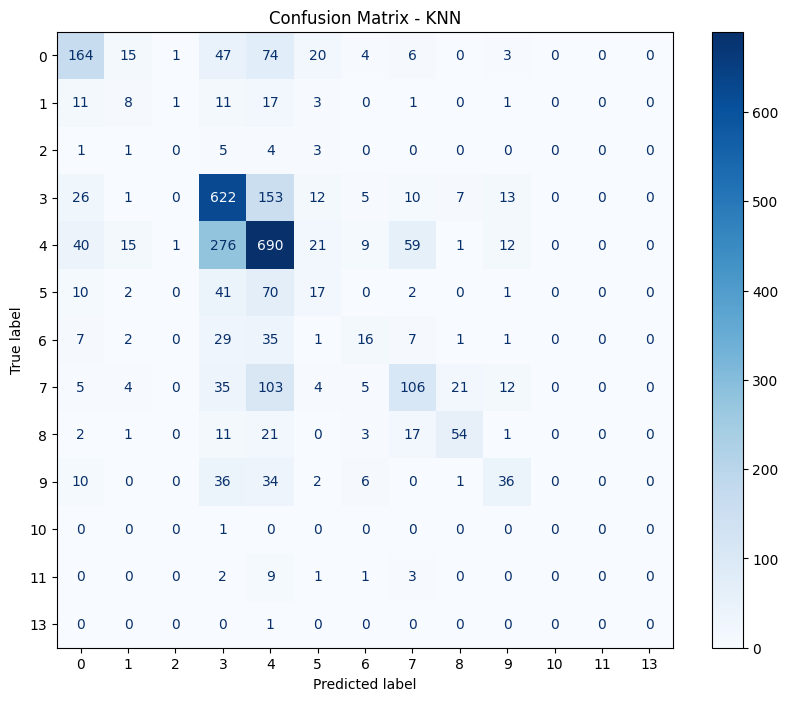

--------------------------------------------------
⏳ SVM...
=== SVM (RBF) ===
Accuracy: 0.4693
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       334
           1       0.00      0.00      0.00        53
           2       0.00      0.00      0.00        14
           3       0.45      0.70      0.55       849
           4       0.46      0.69      0.55      1124
           5       0.00      0.00      0.00       143
           6       0.00      0.00      0.00        99
           7       0.61      0.21      0.32       295
           8       0.67      0.52      0.58       110
           9       0.00      0.00      0.00       125
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00        16
          13       0.00      0.00      0.00         1

    accuracy                           0.47      3164
   macro avg       0.17      0.16      0.15      3164
weighted avg       0.37      0.47      

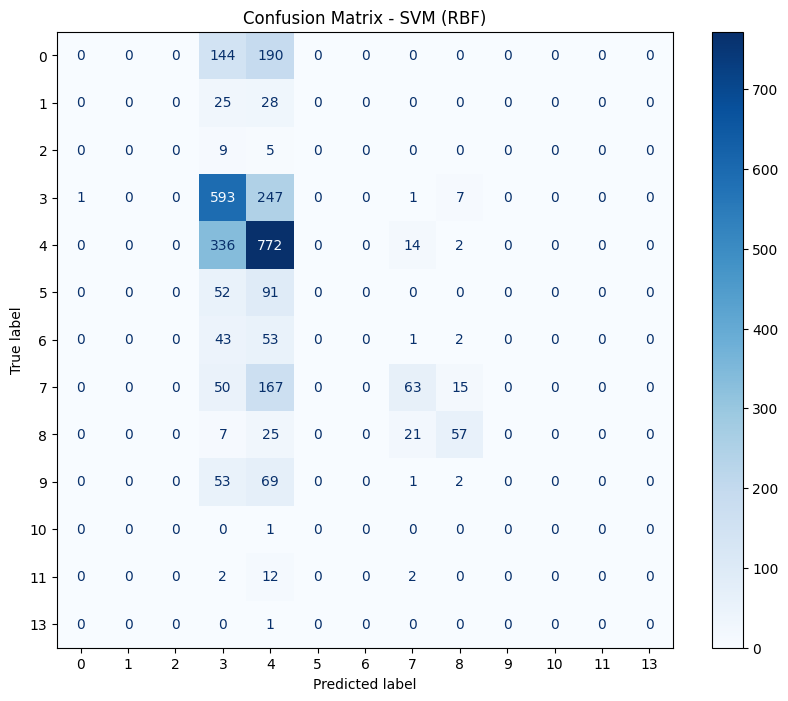

--------------------------------------------------
⏳ Decision Tree...
=== Decision Tree ===
Accuracy: 0.5847
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       334
           1       0.27      0.25      0.26        53
           2       0.09      0.07      0.08        14
           3       0.59      0.74      0.65       849
           4       0.62      0.60      0.61      1124
           5       0.23      0.20      0.21       143
           6       0.43      0.33      0.38        99
           7       0.44      0.41      0.42       295
           8       0.62      0.57      0.59       110
           9       0.43      0.30      0.35       125
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00        16
          13       0.00      0.00      0.00         1

    accuracy                           0.58      3164
   macro avg       0.36      0.33      0.34      3164
weighted avg       0.58  

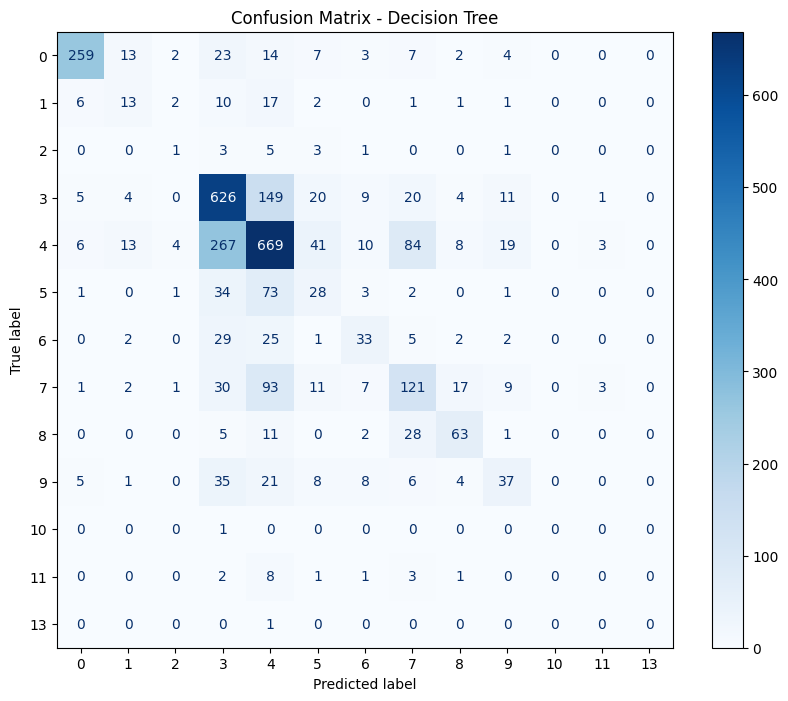

--------------------------------------------------
⏳ Random Forest...
=== Random Forest ===
Accuracy: 0.6103
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       334
           1       0.26      0.11      0.16        53
           2       0.17      0.07      0.10        14
           3       0.62      0.73      0.67       849
           4       0.62      0.65      0.64      1124
           5       0.24      0.22      0.23       143
           6       0.45      0.31      0.37        99
           7       0.49      0.44      0.46       295
           8       0.65      0.55      0.60       110
           9       0.45      0.37      0.40       125
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00        16
          13       0.00      0.00      0.00         1

   micro avg       0.61      0.61      0.61      3164
   macro avg       0.38      0.33      0.35      3164
weighted avg       0.60  

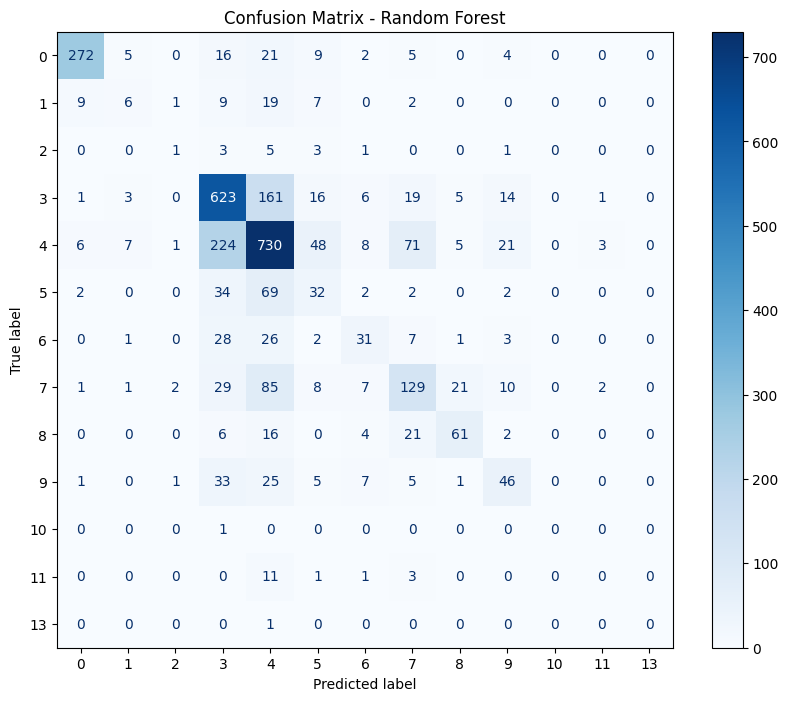

--------------------------------------------------
⏳ Neural Network...
=== Neural Network (MLP) ===
Accuracy: 0.5629
              precision    recall  f1-score   support

           0       0.48      0.61      0.54       334
           1       0.33      0.06      0.10        53
           2       0.00      0.00      0.00        14
           3       0.60      0.69      0.64       849
           4       0.57      0.67      0.61      1124
           5       0.36      0.03      0.05       143
           6       0.24      0.05      0.08        99
           7       0.55      0.43      0.48       295
           8       0.75      0.51      0.61       110
           9       0.49      0.36      0.42       125
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00        16
          13       0.00      0.00      0.00         1

    accuracy                           0.56      3164
   macro avg       0.34      0.26      0.27      3164
weighted avg     

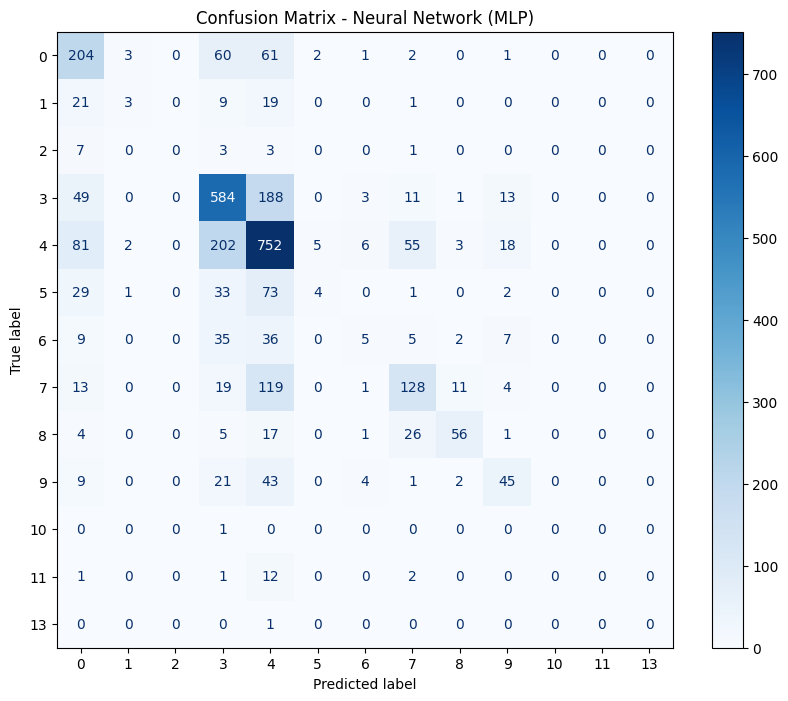

--------------------------------------------------


In [6]:
# --- Lancement des Modèles ---

# 1) KNN
print("⏳ KNN...")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
evaluate_clf_dynamic(knn, X_test_scaled, y_test, "KNN")

# 2) SVM
print("⏳ SVM...")
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_scaled, y_train)
evaluate_clf_dynamic(svm, X_test_scaled, y_test, "SVM (RBF)")

# 3) Decision Tree
print("⏳ Decision Tree...")
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train) # Note: Arbres n'ont pas besoin de scale, mais ça ne nuit pas
evaluate_clf_dynamic(dt, X_test_scaled, y_test, "Decision Tree")

# 4) Random Forest
print("⏳ Random Forest...")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
evaluate_clf_dynamic(rf, X_test_scaled, y_test, "Random Forest")

# 5) Neural Network (MLP)
print("⏳ Neural Network...")
mlp = MLPClassifier(hidden_layer_sizes=(64,32), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)
evaluate_clf_dynamic(mlp, X_test_scaled, y_test, "Neural Network (MLP)")

In [7]:
def accuracy_chart(model, X_test_scaled, y_test, name="Model"):
    y_pred = model.predict(X_test_scaled)

    print(f"=== {name} ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

accuracy_chart(knn, X_test_scaled, y_test, "KNN")
accuracy_chart(svm, X_test_scaled, y_test, "SVM (RBF)")
accuracy_chart(dt, X_test_scaled, y_test, "Decision Tree")
accuracy_chart(rf, X_test_scaled, y_test, "Random Forest")
accuracy_chart(mlp, X_test_scaled, y_test, "Neural Network (MLP)")

=== KNN ===
Accuracy: 0.5414
=== SVM (RBF) ===
Accuracy: 0.4693
=== Decision Tree ===
Accuracy: 0.5847
=== Random Forest ===
Accuracy: 0.6103
=== Neural Network (MLP) ===
Accuracy: 0.5629


 le Meilleur Modèle à Sauvegarder : Random Forest.
 il a la meilleure accuracy

In [8]:
import pickle
filename = 'randomforest_desatertype.pkl'
with open(filename, 'wb') as file:
    pickle.dump(rf, file)

print(f" Modèle sauvegardé sous le nom : {filename}")


 Modèle sauvegardé sous le nom : randomforest_desatertype.pkl
